# Hydrogen Bond

*/ Update July 2018 /*
by Alexis Salas-Burgos PhD

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [1]:
# Load Trajectory
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

/usr/local/anaconda3/envs/bio/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))


In [2]:
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"

In [16]:
# load trajectory
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB

## MDAnalysis
u = mda.Universe(PSF, DCD)

## MDTraj
t = mdt.load(DCD, top=PSF)

## PyTraj
p = mdp.load(DCD, top=PSF)

In [4]:
%matplotlib inline

In [5]:
## MDAnalysis
import MDAnalysis
import MDAnalysis.analysis.hbonds
h = MDAnalysis.analysis.hbonds.HydrogenBondAnalysis(u, 'protein', 'protein', distance=3.0, angle=120.0)
h.run()

HBonds frame    99:   100/100 [100.0%]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb22fca6d8>,
      dtype=object)

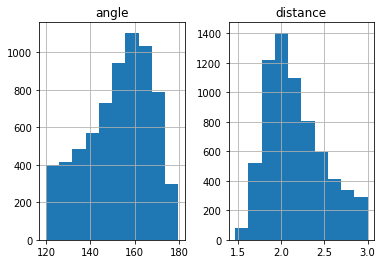

In [6]:
h.generate_table()
import pandas as pd
df = pd.DataFrame.from_records(h.table)
df.hist(column=["angle", "distance"])

In [14]:
from MDAnalysis.analysis import hbonds
import matplotlib.pyplot as plt
H = u.select_atoms('name HA1')
O = u.select_atoms('name O')
N = u.select_atoms('name N')
hb_ac = hbonds.HydrogenBondAutoCorrel(u, acceptors = u.atoms.O,
            hydrogens = u.atoms.HA1, donors = u.atoms.N,bond_type='continuous',
            sample_time = 2, nruns = 20, nsamples = 1000)
hb_ac.run()
hb_ac.solve()
tau = hb_ac.solution['tau']
time = hb_ac.solution['time']
results = hb_ac.solution['results']
estimate = hb_ac.solution['estimate']
plt.plot(time, results, 'ro')
plt.plot(time, estimate)
plt.show()

/usr/local/anaconda3/envs/bio/lib/python3.6/site-packages/MDAnalysis/core/topologyattrs.py:507: DeprecationWarning: Instant selector AtomGroup['<name>'] or AtomGroup.<name> is deprecated and will be removed in 1.0. Use AtomGroup.select_atoms('name <name>') instead.
  DeprecationWarning)


ValueError: Donors and Hydrogen groups must be matched

MET1-N -- VAL17-O
MET1-N -- VAL17-O
MET1-N -- VAL17-O
ILE3-N -- LEU15-O
PHE4-N -- SER65-O


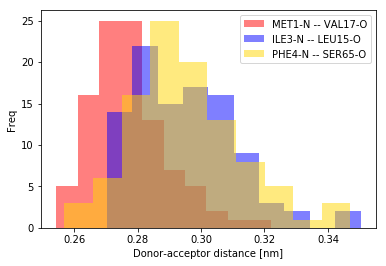

In [17]:
## MDTraj
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import mdtraj as mdt

hbonds = mdt.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds[:5]:
    print(label(hbond))
    
da_distances = mdt.compute_distances(t, hbonds[:, [0,2]], periodic=False)

color = itertools.cycle(['r', 'b', 'gold'])
for i in [2, 3, 4]:
    plt.hist(da_distances[:, i], color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')

plt.show()

In [18]:
## PyTraj
# search hbonds for all residues
hbonds = mdp.search_hbonds(p)
print(hbonds)
print(hbonds.donor_acceptor[:5])
print(hbonds.values[:5])
# search hbonds between residue 9 and 16
h = mdp.search_hbonds(p, ':2,104')
h.donor_acceptor

<pytraj.hbonds.DatasetHBond
donor_acceptor pairs : 119>
['VAL17_O-MET1_N-HT2', 'THR7_O-GLY10_N-HN', 'GLU34_OE2-LYS11_NZ-HZ2', 'ILE3_O-LEU15_N-HN', 'MET1_O-VAL17_N-HN']
[[33 33 32 ... 28 23 27]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  0 ...  1  1  1]]


[]

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['axes.labelcolor'] =  'green' # default green for label
matplotlib.rcParams['axes.linewidth'] =  0.5
from matplotlib import pyplot as plt
import seaborn as sb # add seaborn for pretty plot (vs default one in matplotlib)

hbond distance mask: [':17@O :1@HT2' ':7@O :10@HN' ':34@OE2 :11@HZ2' ... ':60@O :62@HE22'
 ':57@O :60@HD22' ':20@O :20@HG1'] 
 
hbond angle mask: [':17@O :1@HT2 :1@N' ':7@O :10@HN :10@N' ':34@OE2 :11@HZ2 :11@NZ' ...
 ':60@O :62@HE22 :62@NE2' ':57@O :60@HD22 :60@ND2' ':20@O :20@HG1 :20@OG'] 

hbond data
<pytraj.DatasetList with 120 datasets>
total_solute_hbonds
[33 33 32 ... 28 23 27]

VAL17_O-MET1_N-HT2
[1 1 1 ... 0 0 0]

THR7_O-GLY10_N-HN
[1 1 1 ... 0 0 0]
...

SER57_O-ASN60_ND2-HD22
[0 0 0 ... 0 0 0]

SER20_O-SER20_OG-HG1
[0 0 0 ... 0 0 0]
all hbond distances:  [[1.79702919 1.65722946 2.03767441 ... 3.31793972 3.11164535 3.20454746]
 [2.01408837 2.02136329 1.84661773 ... 2.31335572 2.80455887 2.3394424 ]
 [1.65600002 1.71520572 1.7513687  ... 6.51129235 5.99359893 6.89509371]
 ...
 [3.53980697 4.13150469 5.07011816 ... 4.9572415  7.48997566 4.31754983]
 [6.68387878 6.48622314 6.89894788 ... 3.22675171 2.74185685 4.43054383]
 [3.87659708 4.45469473 4.33991779 ... 2.97317968 3.71835193

Text(0,0.5,':5@O :3@HG1')

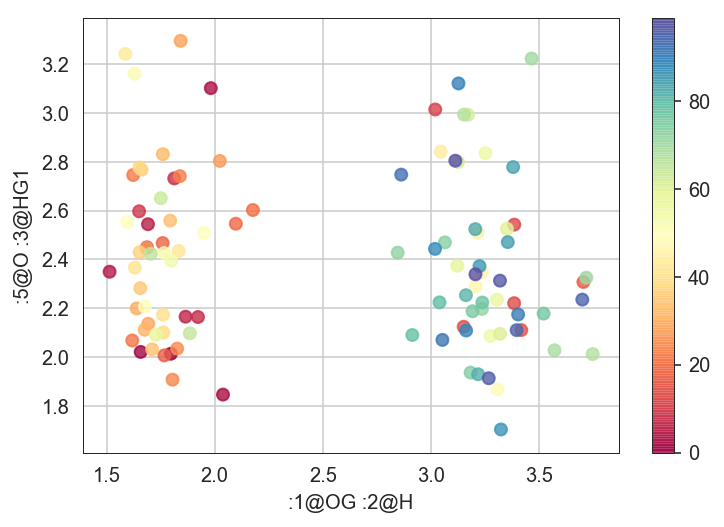

In [21]:
# find hbond
hb = mdp.hbond(p)

distance_mask = hb.get_amber_mask()[0]
print('hbond distance mask: {} \n '.format(distance_mask))

angle_mask = hb.get_amber_mask()[1]
print('hbond angle mask: {} \n'.format(angle_mask))

print("hbond data")
print(hb.data) # 1: have hbond; 0: does not have hbond

# compute distance between donor-acceptor for ALL frames (also include frames that do not form hbond)
dist = mdp.distance(p, hb.get_amber_mask()[0])
print('all hbond distances: ', dist)

angle = mdp.angle(p, hb.get_amber_mask()[1])
print(angle)

sb.color_palette('deep', n_colors=6, desat=0.5)
sb.set_style(style='white')

# scatter plot for distance between ':1@OG :2@H' and ':5@O :3@HG1'
# the point is colored by frame number (total frame = traj.n_frames (101))
fig = plt.scatter(dist[0], dist[1], marker='o', c=range(p.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()
plt.grid()
plt.xlabel(':1@OG :2@H')
plt.ylabel(':5@O :3@HG1')

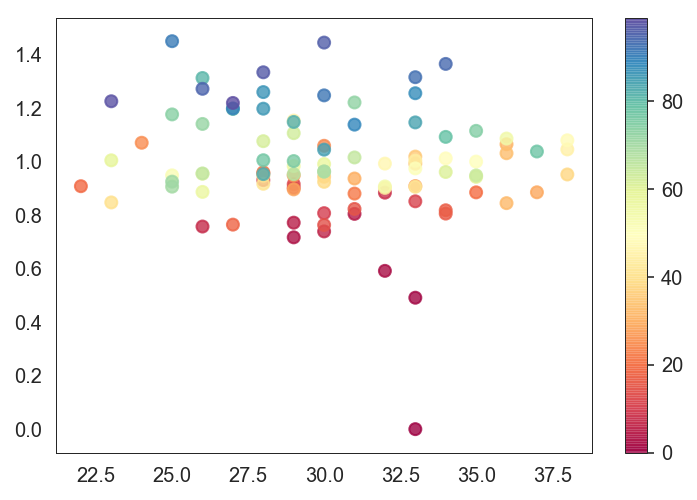

In [23]:
hbond_data = hb
rmsd_to_lowest_pdb = mdp.rmsd(p, ref=0, mask='@N,CA,C')
# plot total hbond number vs rmsd
# color by frame number
n_hbonds_per_frame = hbond_data.total_solute_hbonds()
fig = plt.scatter(n_hbonds_per_frame, rmsd_to_lowest_pdb, 
                  marker='o', c=range(t.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()

In [32]:
# get distance and angle mask for each hbond
h_dist_mask, h_angle_mask = hbond_data.get_amber_mask()
print(h_dist_mask)
print(h_angle_mask)

# compute hbond distance
# use dtype='dataframe' to dump distance data to pandas' DataFrame
h_dist = mdp.distance(p, h_dist_mask, dtype='dataframe')

# need to update mask
h_dist.columns = h_dist_mask

# just want to show some data
h_dist[h_dist_mask[:3]].head(5)

[':17@O :1@HT2' ':7@O :10@HN' ':34@OE2 :11@HZ2' ... ':60@O :62@HE22'
 ':57@O :60@HD22' ':20@O :20@HG1']
[':17@O :1@HT2 :1@N' ':7@O :10@HN :10@N' ':34@OE2 :11@HZ2 :11@NZ' ...
 ':60@O :62@HE22 :62@NE2' ':57@O :60@HD22 :60@ND2' ':20@O :20@HG1 :20@OG']


,:17@O :1@HT2,:7@O :10@HN,:34@OE2 :11@HZ2
0,1.797029,2.014088,1.656000
1,1.657229,2.021363,1.715206
2,2.037674,1.846618,1.751369
3,1.981438,3.101745,1.893370
4,1.513430,2.349926,1.820284


count    100.000000
mean       2.539349
std        0.769744
min        1.513430
25%        1.759640
50%        2.887110
75%        3.234320
max        3.746309
Name: :17@O :1@HT2, dtype: float64


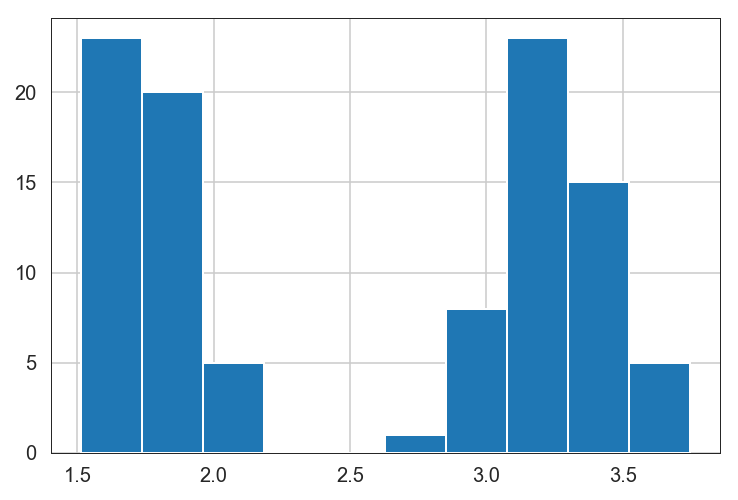

In [39]:
# plot
par_00 = h_dist_mask[0]
print(h_dist[par_00].describe())
h_dist[par_00].hist()

In [43]:
hb.data[1]

<pytraj.array.DataArray: size=100, key=VAL17_O-MET1_N-HT2, dtype=int32, ndim=1> 
values:
[1 1 1 ... 0 0 0]

[1 1 1 ... 0 0 0]
h_frames [ 0  1  2 ... 64 65 66]
hbond distance [1.79702919 1.65722946 2.03767441 ... 1.75036796 1.88405096 1.70377116]
1.7404242888540118
0.10984921839426214


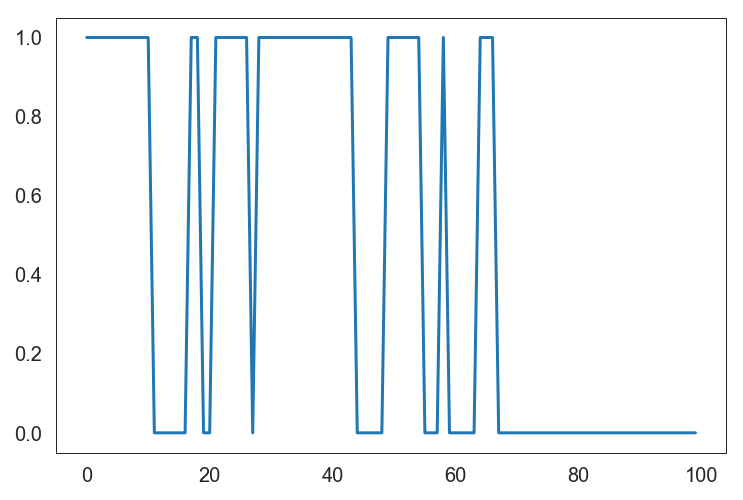

In [48]:
# Filter frames that form hbond for specific donor-acceptor
# 1st pairs: SER1_OG-TRP2_N-H
h_values = hb.data[1].values # 1: For hbond; 0: not form hbond
print(h_values)

# filter distances from frames forming hbond
import numpy
h_frames = numpy.where(h_values==1)[0] # frame indices forming hbond
print('h_frames', h_frames)

arr = dist[0][h_frames]
print('hbond distance', arr)

print(numpy.mean(arr))
print(numpy.std(arr))

import matplotlib as plt
plt.pyplot.plot(hbond_data[1].values)

# Incorporar análisis con Arpeggio